Импортируем сразу все необходимые библиотеки для нашего исследования

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Загружаем исходные данные из обеих excel таблиц и удаляем колонку с индексом

In [2]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df_bp = pd.read_excel(r"C:\Users\Avona\Desktop\Моя ВКР\Datasets\X_bp.xlsx")
df_bp.shape

(1023, 11)

In [3]:
#Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
#Посмотрим на первые 5 строк первого датасета и убедимся, что первый столбец удалился
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [4]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [5]:
# Загружаем второй датасет (углепластик) 
df_nup = pd.read_excel(r"C:\Users\Avona\Desktop\Моя ВКР\Datasets\X_nup.xlsx")
df_nup.shape

(1040, 4)

In [6]:
#Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
#Посмотрим на первые 5 строк второго датасета и убедимся, что и здесь не нужный первый столбец успешно удалился
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                 0.0          4.0               57.0
1                 0.0          4.0               60.0
2                 0.0          4.0               70.0
3                 0.0          5.0               47.0
4                 0.0          5.0               57.0

In [7]:
# Проверим размерность второго файла
df_nup.shape

(1040, 3)

Объединим по индексу, тип объединения INNER, смотрим итоговый датасет

In [8]:
# Понимаем, что эти два датасета имеют разный объем строк. 
# Но наша задача собрать исходные данные файлы в один, единый набор данных. 
# По условию задачи объединяем их по типу INNER. 
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

Проверяем размеры данных

In [9]:
#Посмотрим количество колонок и столбцов
df.shape
# Итоговый датасет имеет 13 столбцов и 1023 строки, 17 строк из таблицы X_nup было отброшено,т.е часть данных удалена на начальном этапе исследования.

(1023, 13)

In [ ]:
Проведем разведочный анализ.

In [10]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [11]:
#Проверим тип данных в каждом столбце (типы признаков)
df.info()
# все переменные содержат значения float64, качественные характеристики отсутствуют. Пропусков не имеется. Ни одна из записей не является NaN, очистка не требуется. Объединенный файл имеет всего 1023 строки.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [12]:
#Поиск уникальных значений с помощью функции nunique
df.nunique()
#Видим в основном общее число уникальных значений в каждом столбце, но в столбце "Угол нашивки" всего 2 значения. Поработаем с ним. 

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [13]:
# Поработаем со столбцом "Угол нашивки"

In [14]:
df['Угол нашивки, град'].nunique()
#Так как кол-во уникальных значений в колонке Угол нашивки равно 2, можем привести данные в этой колонке к значениям 0 и 1

2

In [15]:
#Проверим кол-во элементов, где Угол нашивки равен 0 градусов
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [16]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1 и integer
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [17]:
#Переименуем столбец
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
0                       3000.000000               220.000000             0   
1                       3000.000000               220.000000             0   
2                       3000.000000               220.000000             0   
3                       3000.000000               220.000000             0   
4                       3000.000000               220.000000             0   
...                             ...                      ...           ...   
1018                    2387.292495               125.007669             1   
1019                    2360.392784               117.730099             1   
1020                    2662.906040               236.606764             1   
1021                    2071.715856               197.126067      

In [18]:
#Посчитаем количество элементов, где угол нашивки равен 0 градусов и убедимся, что количество не изменилось после наших манипуляций
df['Угол нашивки'][df['Угол нашивки'] == 0.0].count()
#После преобразования колонки Угол нашивки к значениям 0 и 1, кол-во элементов, где угол нашивки равен 0 не изменилось (520 до и после преобразования)

520

In [19]:
# Переведем столбец с нумерацией в integer
df.index = df.index.astype('int')

In [20]:
# Сохраним итоговый датасет в отдельную папку с данными, чтобы долго не искать
df.to_excel("Itog\itog.xlsx")

In [21]:
#Изучим описательную статистику наших данных (максимальное, минимальное, квартили, медиана, стандартное отклонение, среднее значение и т.д.), посмотрим на основные параметры анализа данных
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1023.000000              1023.000000   1023.000000   
mean                     2466.922843               218.423144      0.491691   
std                       485.628006                59.735931      0.500175   
min                      1036.856605                33.803026      0.000000   
25%                      2135.850448               179.627520      0.000000   
50%                      2459.524526               219.198882      0.000000   
75%                      2767.193119               257.481724      1.000000   
max                      3848.436732               414.590628      1.000000   

       Шаг нашивки  Плотность нашивки  
count  1023.000000        1023.000000  
mean      6.899222          57.153929  
std       2.563467          12.350969  
min       0.000000           0.000000  
25%       5.080033          49.799212  
50%       6.916144          57.341920  
75%       8.586293          64.944961  
max      14.440522         103.988901

In [22]:
a = df.describe()
a.T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки                          1023.0     0.491691    0.500175   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки                             0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки                             1.000000     1.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

# Описательная статистика содержит по каждому столбцу (по каждой переменной):
* count - количество значений
* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - верхнее значение первого квартиля
* 50% - медиана
* 75% - верхнее значение третьего квартиля
* max - максимум

In [23]:
# Пропуски данных

In [24]:
# Проверим на пропущенные данные
df.isnull().sum()
# Пропущенных данных нет = нулевых значений нет, очистка не требуется

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

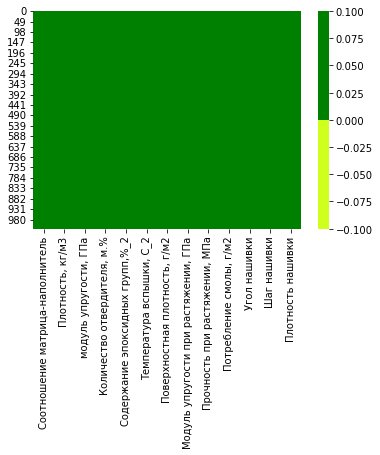

In [25]:
#светло-зеленый - не пропущенные, темнозеленый - пропущенные данные
cols = df.columns
colours = ['#ceff1d', '#008000'] 
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))
#Тепловая карта, так же как info() и функция ISNULL() показывает, что пропусков нет.

In [26]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


In [27]:
#Дубликаты

In [28]:
# Проверим датасет на дубликаты
df.duplicated().sum()
#Дубликатов нет

0

In [29]:
#По заданию необходимо получить среднее, медианное значение для каждой колонки
#среднее значение

In [30]:
#получим среднее и медианное значения данных в колонках
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]
#в целом мы видим близкие друг к другу значения

Соотношение матрица-наполнитель  Плотность, кг/м3  \
mean                         2.930366       1975.734888   
50%                          2.906878       1977.621657   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
mean             739.923233                   110.570769   
50%              739.664328                   110.564840   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
mean                        22.244390                285.882151   
50%                         22.230744                285.896812   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
mean                     482.731833                             73.328571   
50%                      451.864365                             73.268805   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
mean                    2466.922843               218.423144      0.491691   
50%                     2459.524526               219.198882      0.000000   

      Шаг нашивки  Плотность нашивки  
mean     6.899222          57.153929  
50%      6.916144          57.341920

In [31]:
# среднее значение

In [32]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки                               0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [33]:
# медианное значение

In [34]:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки                               0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [35]:
# Вычисляем коэффициенты ранговой корреляции Кендалла. Статистической зависимости не наблюдаем.
df.corr(method = 'kendall')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.003135   
модуль упругости, ГПа                                        0.021247   
Количество отвердителя, м.%                                  0.001410   
Содержание эпоксидных групп,%_2                              0.010180   
Температура вспышки, С_2                                    -0.009480   
Поверхностная плотность, г/м2                               -0.002060   
Модуль упругости при растяжении, ГПа                        -0.004157   
Прочность при растяжении, МПа                                0.011614   
Потребление смолы, г/м2                                      0.035145   
Угол нашивки                                                -0.021395   
Шаг нашивки                                                  0.022723   
Плотность нашивки                                            0.002788   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.003135               0.021247   
Плотность, кг/м3                              1.000000              -0.008059   
модуль упругости, ГПа                        -0.008059               1.000000   
Количество отвердителя, м.%                  -0.021963               0.022382   
Содержание эпоксидных групп,%_2              -0.007758               0.002351   
Температура вспышки, С_2                     -0.019947               0.021028   
Поверхностная плотность, г/м2                 0.037302              -0.000442   
Модуль упругости при растяжении, ГПа         -0.021151               0.005458   
Прочность при растяжении, МПа                -0.047426               0.022959   
Потребление смолы, г/м2                      -0.017079               0.005169   
Угол нашивки                                 -0.051525              -0.031695   
Шаг нашивки                                  -0.031220              -0.008305   
Плотность нашивки                             0.052935               0.049347   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001410   
Плотность, кг/м3                                        -0.021963   
модуль упругости, ГПа                                    0.022382   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.000010   
Температура вспышки, С_2                                 0.059034   
Поверхностная плотность, г/м2                            0.033110   
Модуль упругости при растяжении, ГПа                    -0.043140   
Прочность при растяжении, МПа                           -0.046507   
Потребление смолы, г/м2                                 -0.003677   
Угол нашивки                                             0.024690   
Шаг нашивки                                              0.006232   
Плотность нашивки                                        0.016607   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.010180   
Плотность, кг/м3                                            -0.007758   
модуль упругости, ГПа                                        0.002351   
Количество отвердителя, м.%                                  0.000010   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.002170   
Поверхностная плотность, г/м2                               -0.006859   
Модуль упругости при растяжении, ГПа                         0.041994   
Прочность при растяжении, МПа                               -0.013441   
Потребление смолы, г/м2                                      0.009756   
Угол нашивки                                                 0.004668   
Шаг нашивки                          

In [36]:
#Вычисляем коэффициенты корреляции Пирсона. Статистической зависимости не наблюдаем.
df.corr(method ='pearson')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки                                                -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки                                 -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки                                             0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки                                                 0.008052   
Шаг нашивки                          

In [37]:
#Создадим переменную для названия всех столбцов. Это нам пригодится при построении моделей. И перейдем к визуализации данных
df.columns
#column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
#         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
#         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
#        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = df.columns

In [ ]:
# Визуализируем сырые данные и проведем анализ
* Построим гистограммы распределения каждой из переменных и боксплоты (несколько разных способов визуализации),
* диаграммы "ящиков с усами" (несколько вариантов),
* попарные графики рассеяния точек (несколько вариантов)
* графики квантиль-квантиль
без нормализации и исключения шумов



Показатели описательной статистики и визуализация гистограмм и/или диа-грамм размаха («ящик с усами») позволяют получить наглядное представление о характерах распределений переменных. Такое частотное распределение показыва-ет, какие именно конкретные значения или диапазоны значений исследуемой пере-менной встречаются наиболее часто, насколько различаются эти значения, распо-ложено ли большинство наблюдений около среднего значения, является распреде-ление симметричным или асимметричным, многомодальным (т.е. имеет две или более вершины) или одномодальным и т.д. По форме распределения можно судить о природе исследуемой переменной (например, бимодальное распределение позволяет предположить, что выборка не является однородной и содержит наблюдения, принадлежащие двум различным множествам, которые в свою очередь нормально распределены).

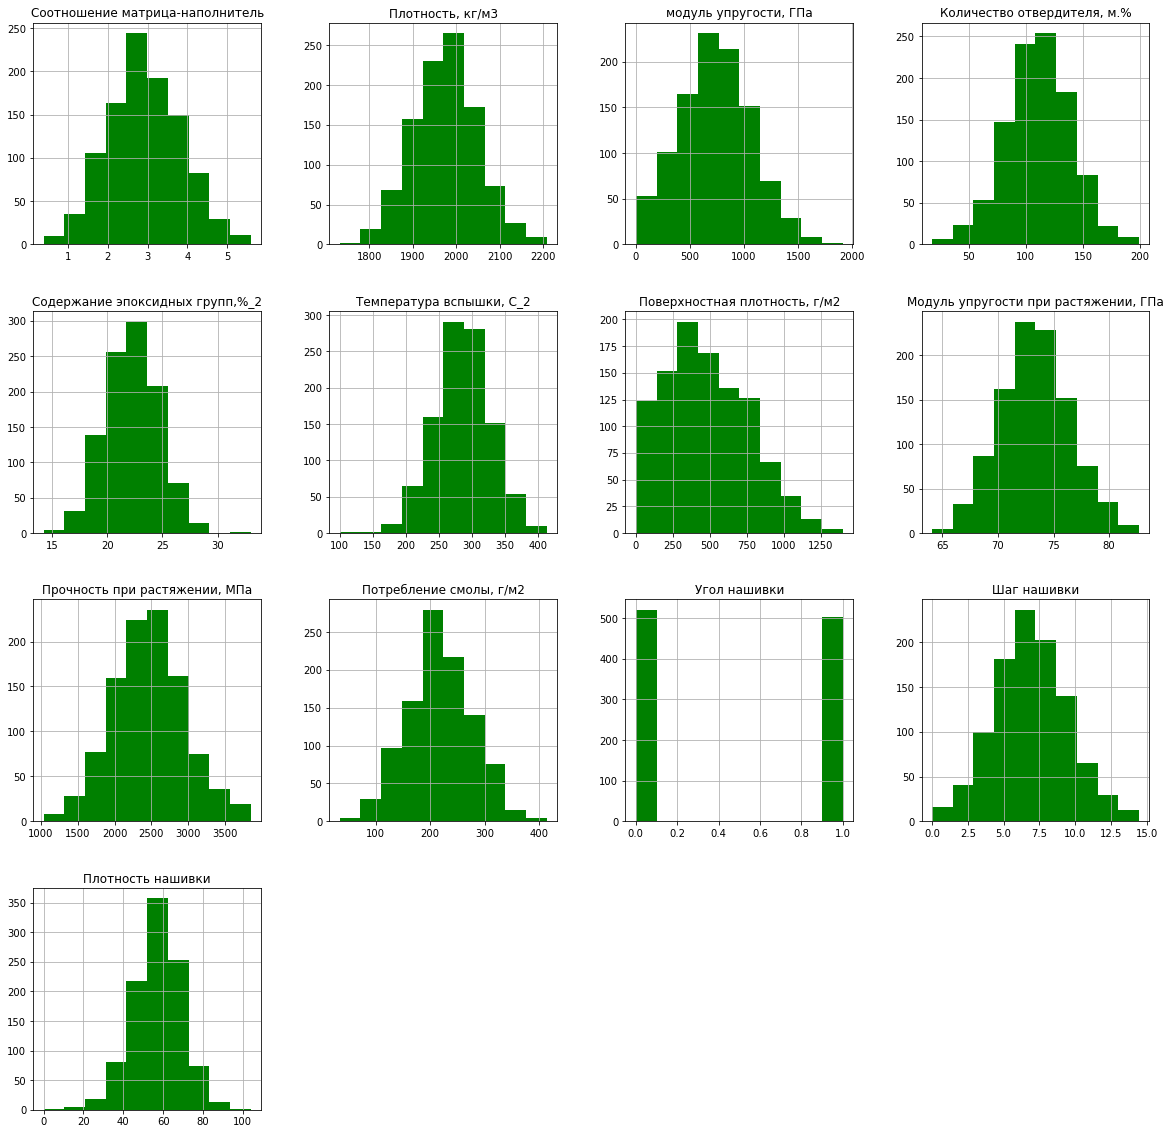

In [38]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения шумов
df.hist(figsize = (20,20), color = "g")
plt.show()

При проведении анализа выявлены параметры близкие к нормальному: Соотношение матрица-наполнитель; Плотность, кг/м3; Модуль упругости, Гпа; Количество отвердителя, м.%; Содержание эпоксидных групп,%_2; Температура вспышки, С_2; Поверхностная плотность, г/м2; Модуль упругости при растяжении, Гпа; Прочность при растяжении, Мпа; Потребление смолы, г/м2; Шаг нашивки; Плотность нашивки. Преимущественно данные стремятся к нормальному распределению. Угол нашивки, как и отражено в датасете, имеет только два значения 90 градусов и 0 градусов, что отражает общий подход к проведению нашивки материалов, а также может быть использовано при обработке данных. Учитывая отсутствие иных показателей для угла нашивки, предлагаем в прогнозе использовать категориальный, а не непрерывный подход при анализе данного параметра.

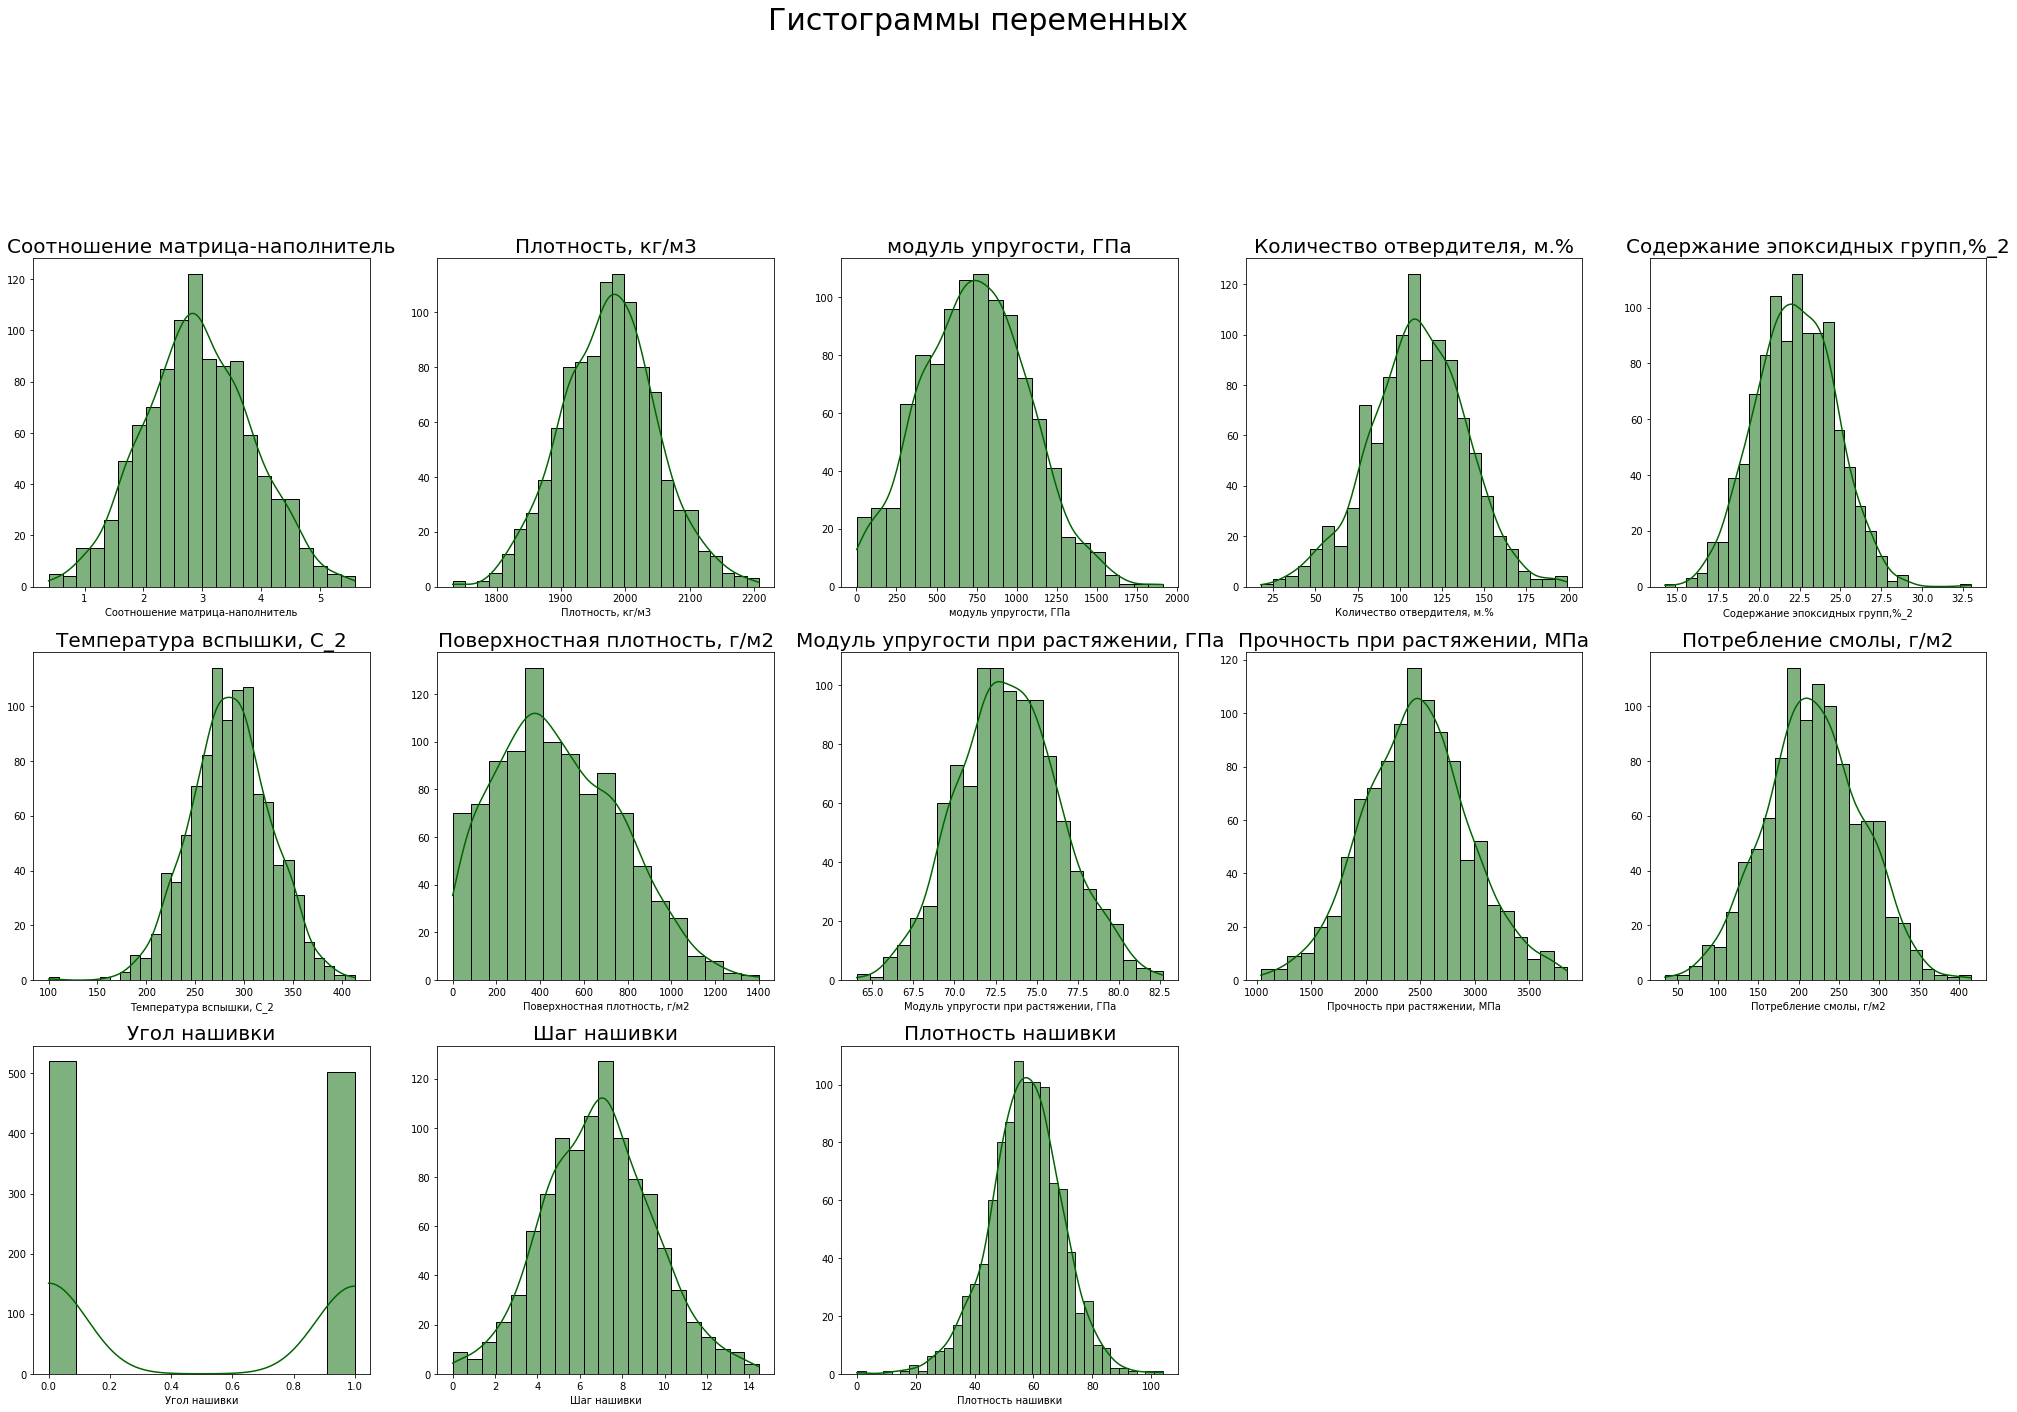

In [39]:
# Гистограмма распределения (второй вариант)
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Гистограммы переменных', fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df[col], kde=True, color = "darkgreen")
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1
#Гистограммы показывают ярковыраженные выбросы в столбцах: плотность, содержание эпоксидных групп, температура вспышки, плотность нашивки. 
#Данные стремятся к нормальному распределению практически везде, кроме угла нашивки, имеющим только 2 значения, с которым мы уже поработали ранее. 

In [ ]:
for column in df.columns:
    fig = px.box(df, y = column)
    fig.show()

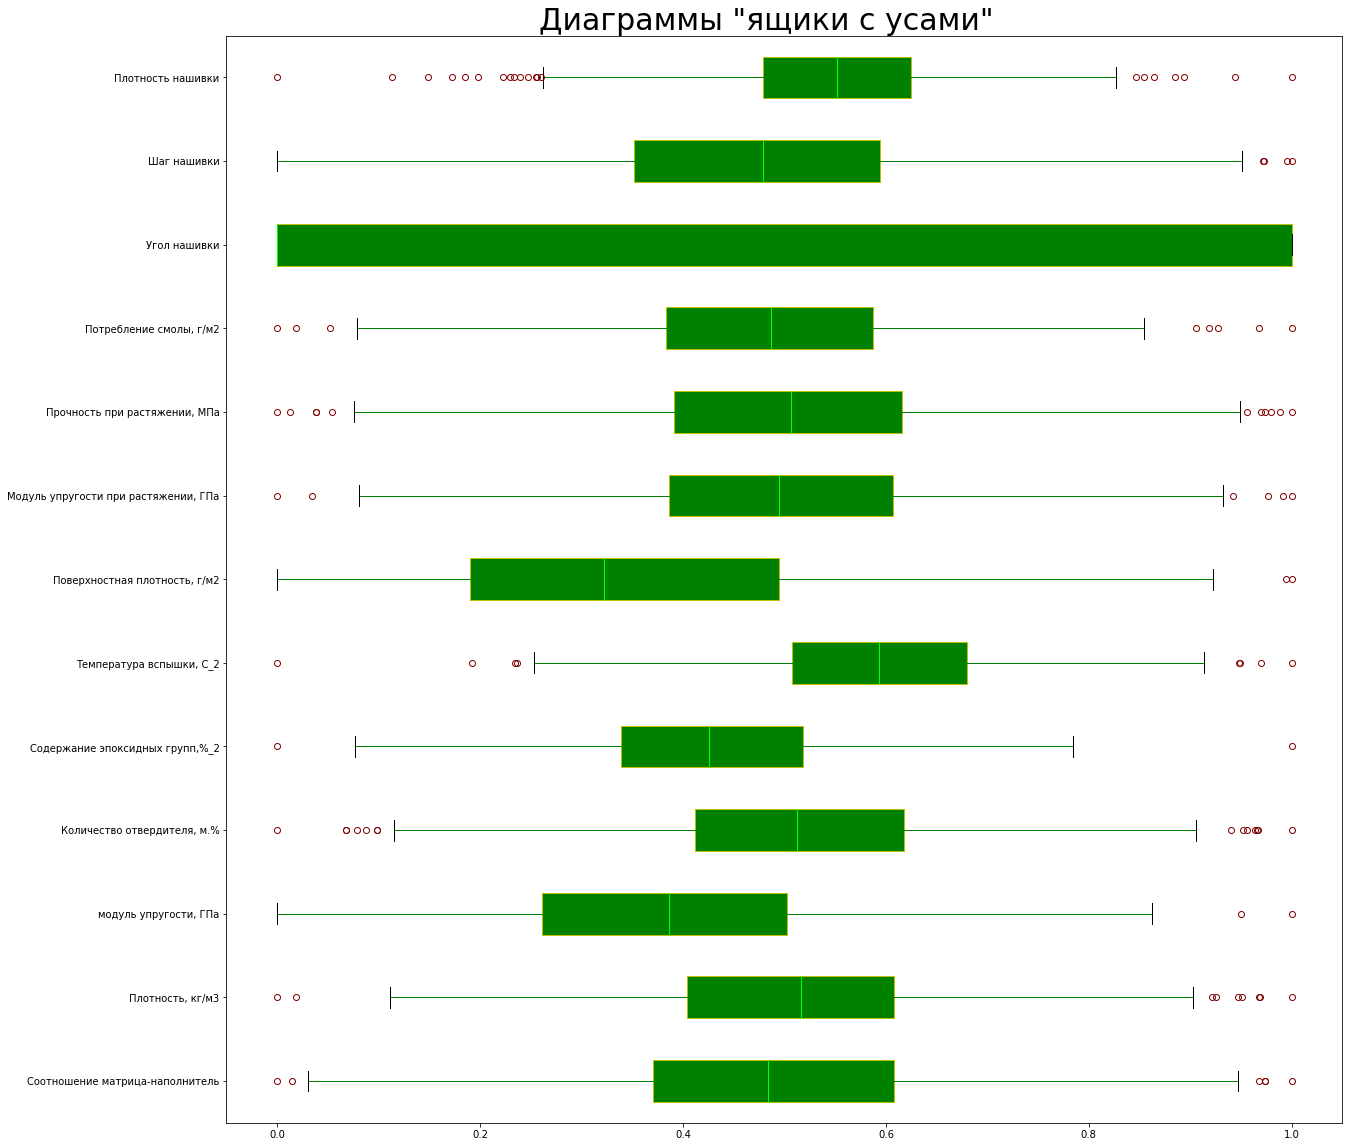

In [42]:
# "Ящики с усами"(боксплоты) (первый вариант)
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (20, 20))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color="g"), capprops = dict(color = "black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

Многие алгоритмы машинного обучения чувствительны к разбросу и рас-пределению значений признаков обрабатываемых объектов. Соответственно, вы-бросы во входных данных могут исказить и ввести в заблуждение процесс обучения алгоритмов машинного обучения, что приводит к увеличению времени обучения, снижению точности моделей и, в конечном итоге, к снижению результатов.

In [ ]:
# Ящики с усами (второй вариант)
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter

plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'y', color = 'g'), medianprops = dict(color = 'lime'), whiskerprops = dict(color="g"), capprops = dict(color = "yellow"), flierprops = dict(color="y", markeredgecolor = "lime"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1
# "Ящики с усами" показывают наличие выбросов во всех столбцах, кроме углов нашивки, значит, с ними будем работать

In [ ]:
# Гистограмма распределения и диаграмма "ящик с усами" вместе с данными по каждому столбцу
for column_name in column_names:
    print(column_name)
    
    #Гистограмма распределения
    gis = df[column_name]
    sns.set_style("whitegrid")
    sns.kdeplot(data = gis, shade = True, palette ='colorblind', color = "g")
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=gis, color = "g");
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end = " ")
    print(np.min(gis))
    print("Максимальное значение: ", end=" ")
    print(np.max(gis))
    print("Среднее значение: ", end = " ")
    print(np.mean(gis))

    print("Медианное значение: ", end = " ")
    print(np.median(gis))
    print("\n\n")
# Кроме "Угол нашивки, град" и "Поверхностная плотность, г/м2" остальные переменные относительно хорошо соответствуют нормальному распределению

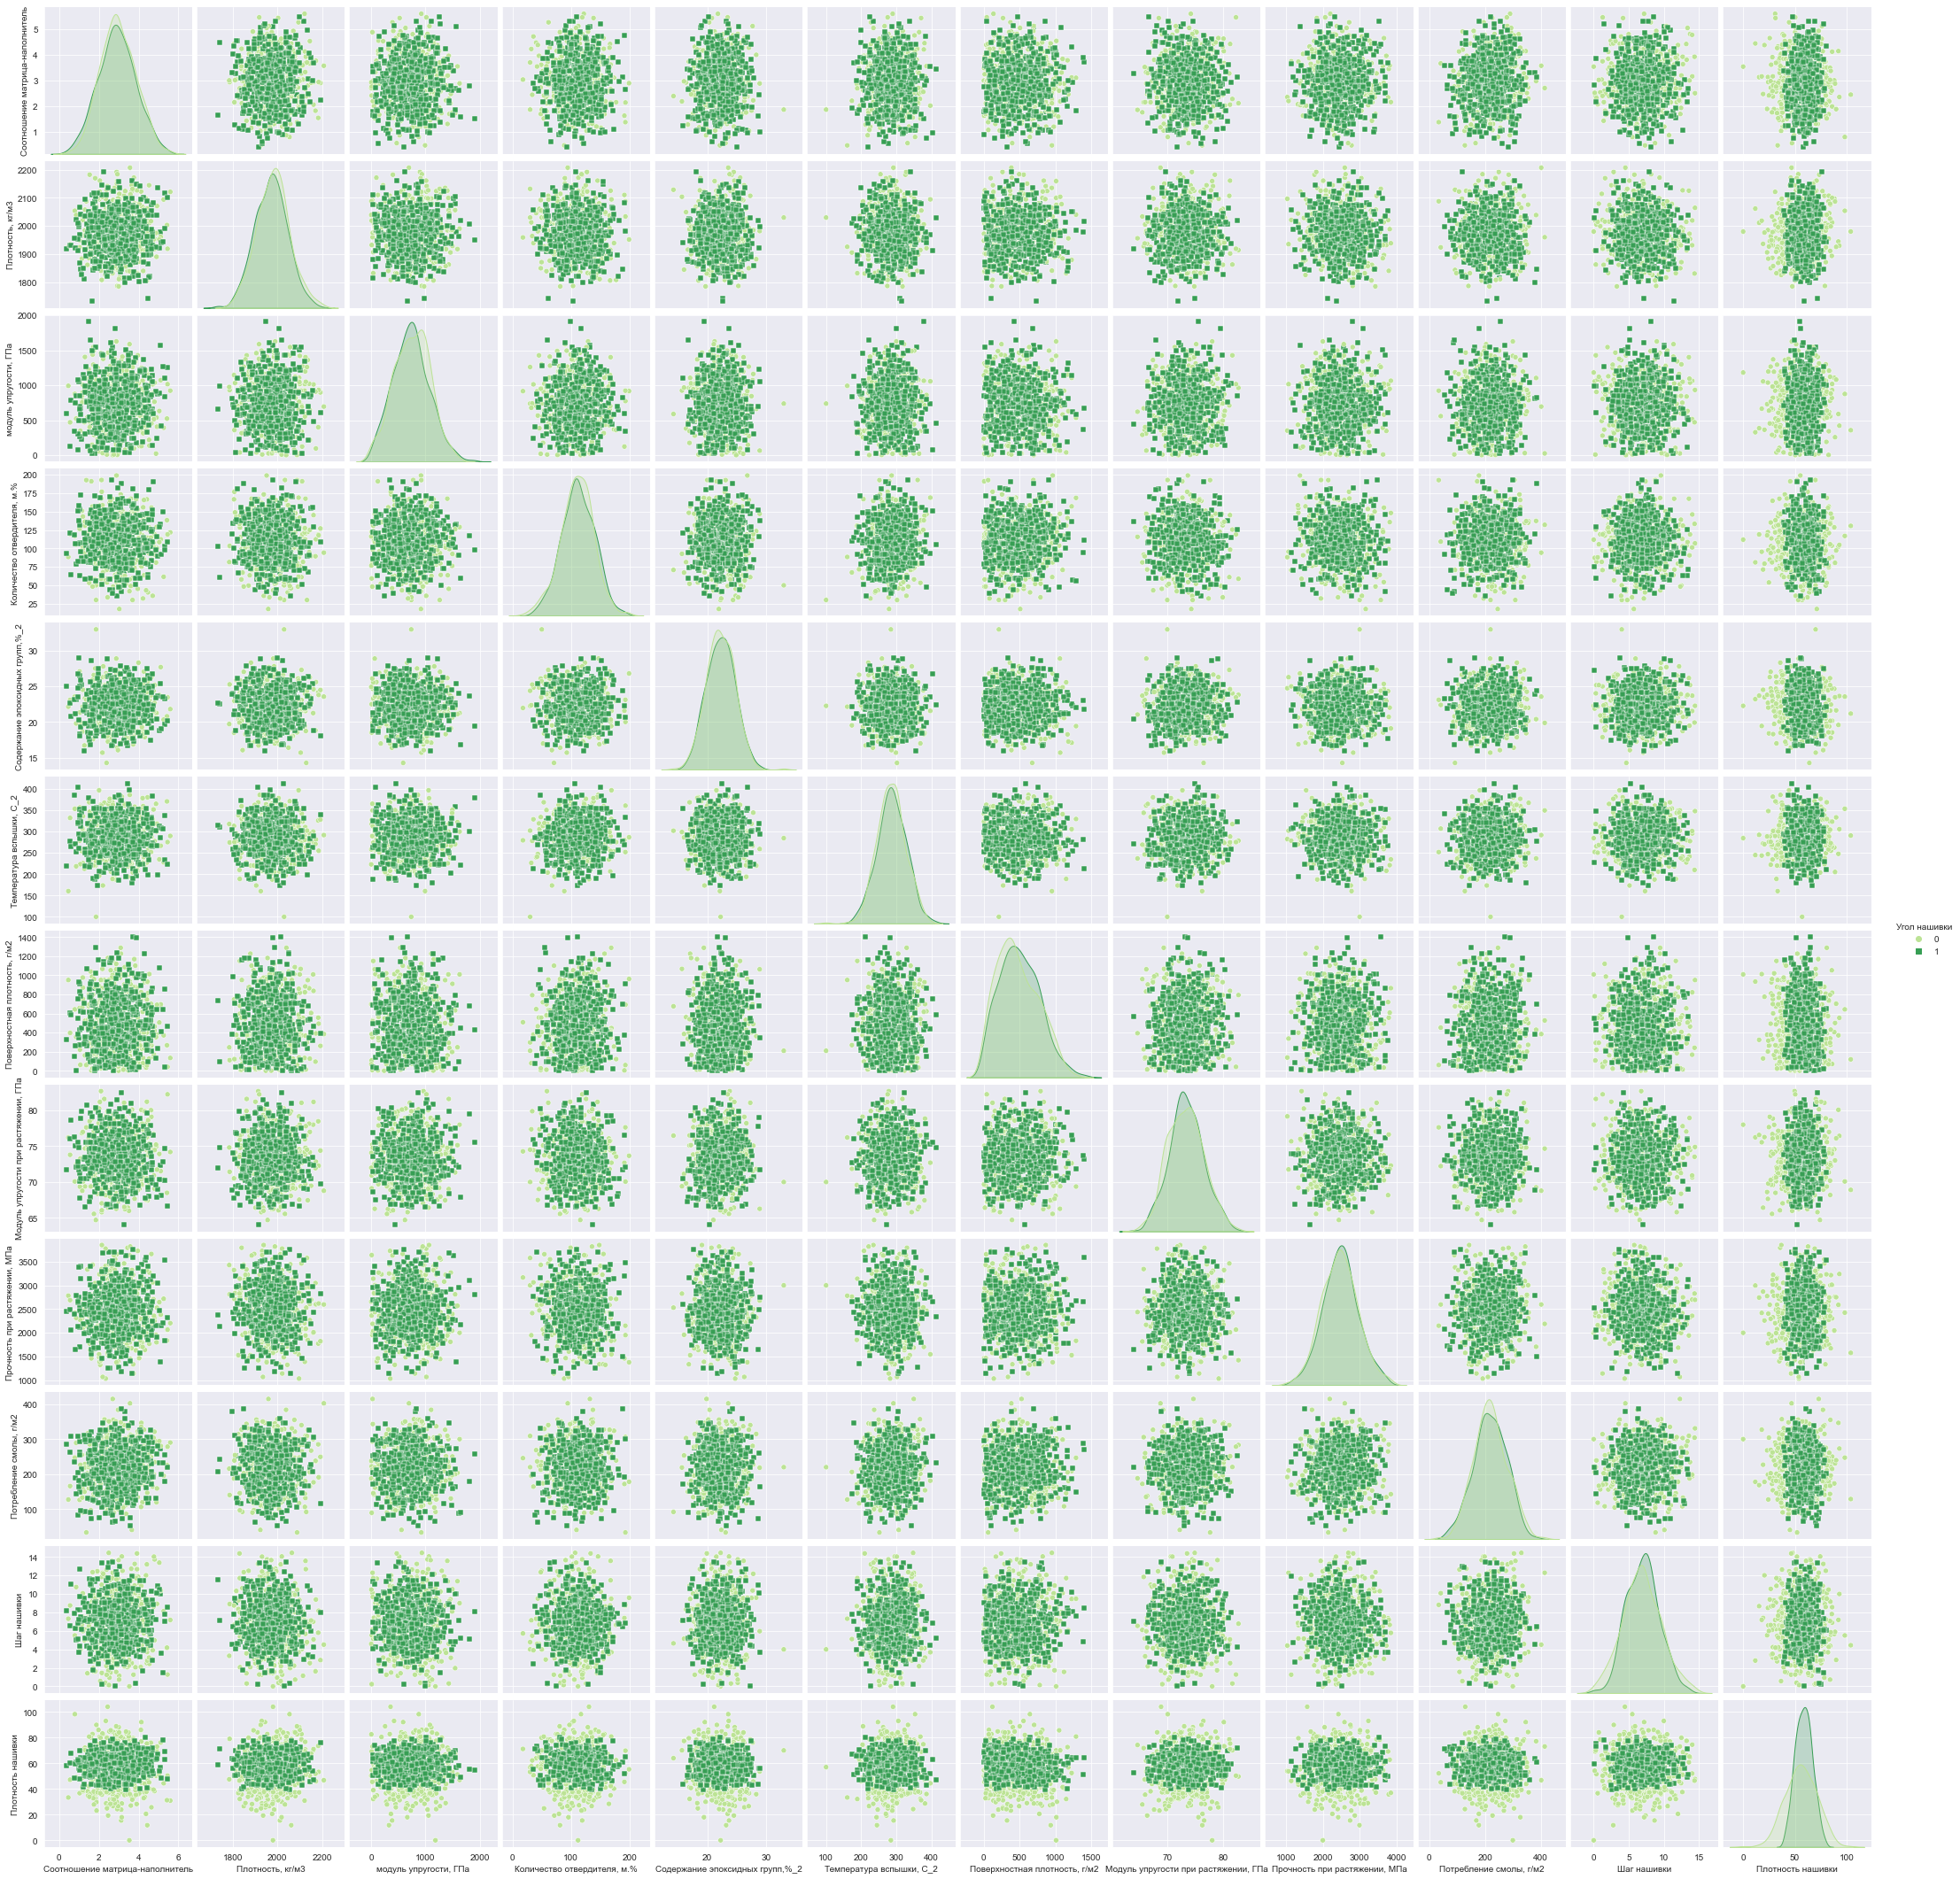

In [45]:
# Попарные графики рассеяния точек (матрица диаграмм рассеяния) (первый вариант)
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette='YlGn')
# Попарные графики рассеяния точек так же не показывают какой-либо зависимости между данными. Зависимость между показателями не линейная, взаимосвязь отсутствует, необходимо использовать несколько показателей. 
# из графиков можно наблюдать выбросы, потому что некоторые точки располагаются далеко от общего облака
# Отсутствие линейной корреляции наверняка подтвердится при построении регрессии?

<function matplotlib.pyplot.show(close=None, block=None)>

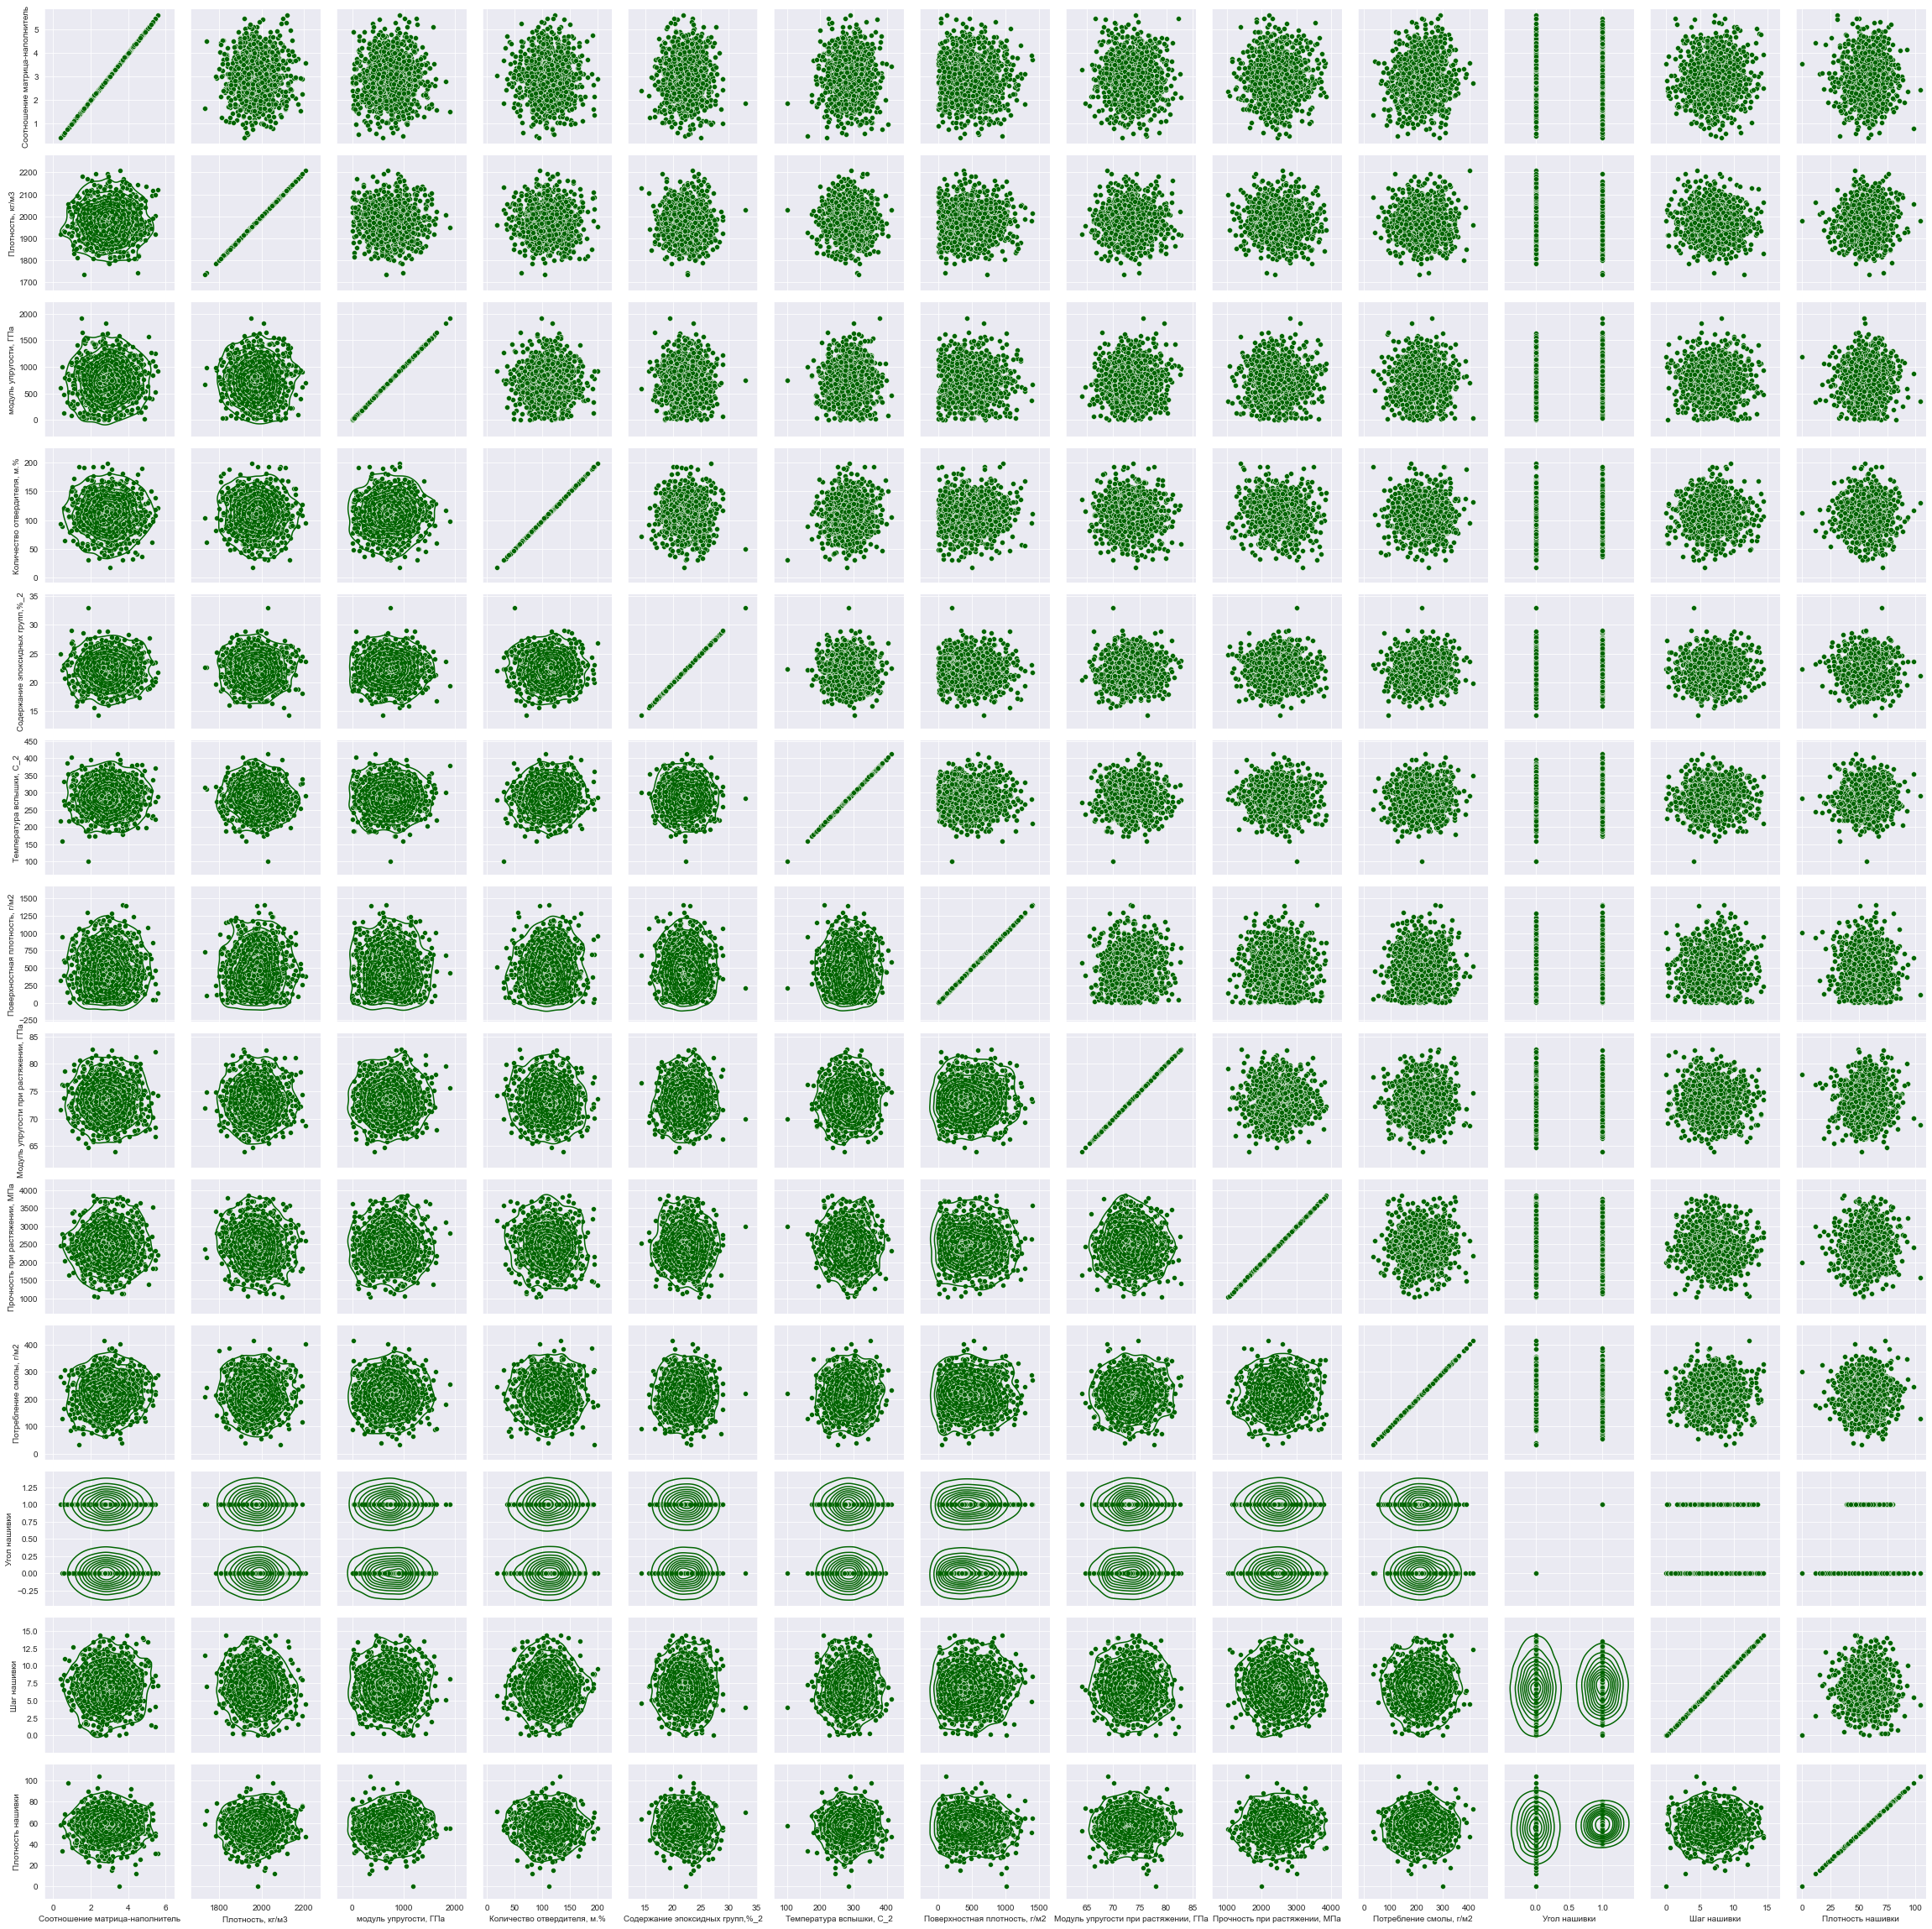

In [46]:
# Попарные графики рассеяния точек - скаттерплоты (второй вариант) 
g = sns.PairGrid(df[df.columns])
g.map(sns.scatterplot, color = 'darkgreen')
g.map_upper(sns.scatterplot, color = 'darkgreen')
g.map_lower(sns.kdeplot, color = 'darkgreen')
plt.show
# Корреляции нет

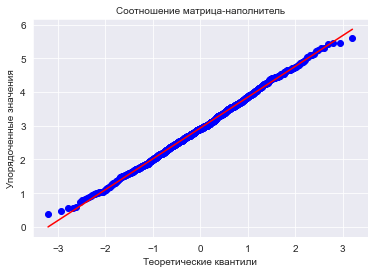

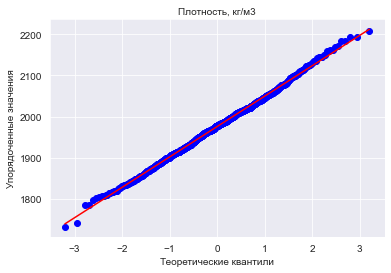

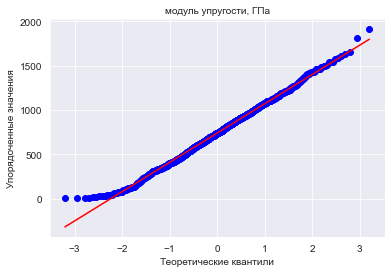

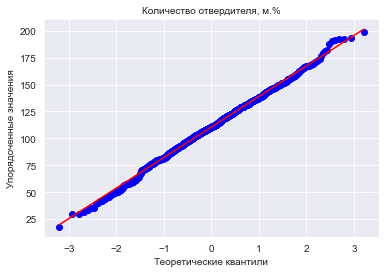

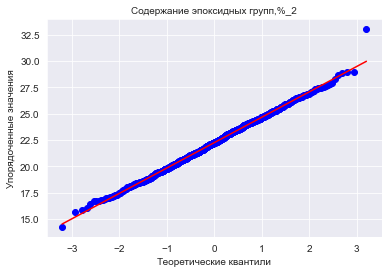

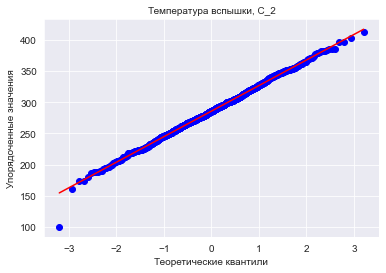

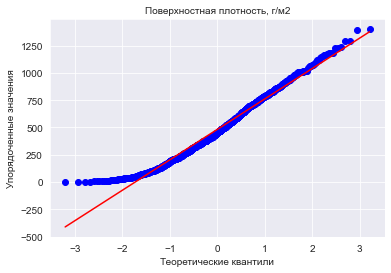

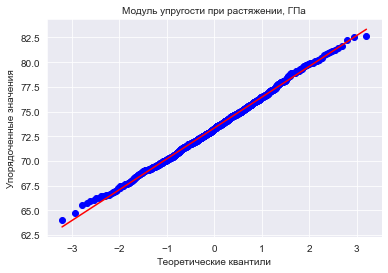

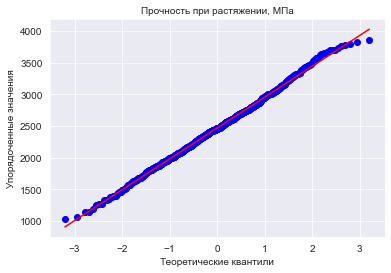

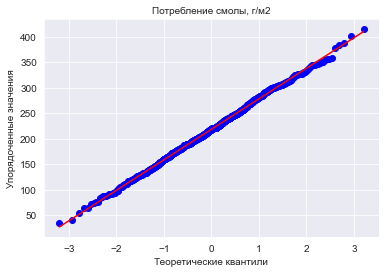

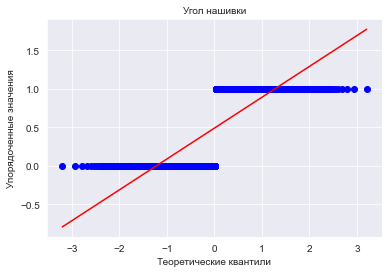

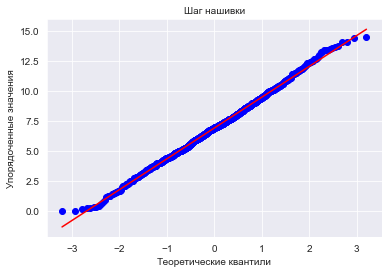

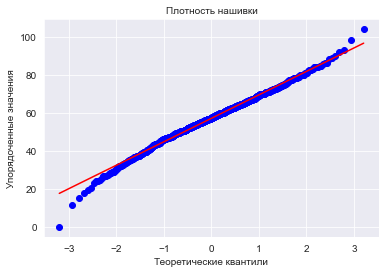

In [47]:
# график qq
for i in df.columns:
    plt.figure(figsize = (6, 4))
    res = stats.probplot(df[i], plot = plt)
    plt.title(i, fontsize = 10)
    plt.xlabel("Теоретические квантили", fontsize = 10)
    plt.ylabel("Упорядоченные значения", fontsize = 10)
    plt.show()

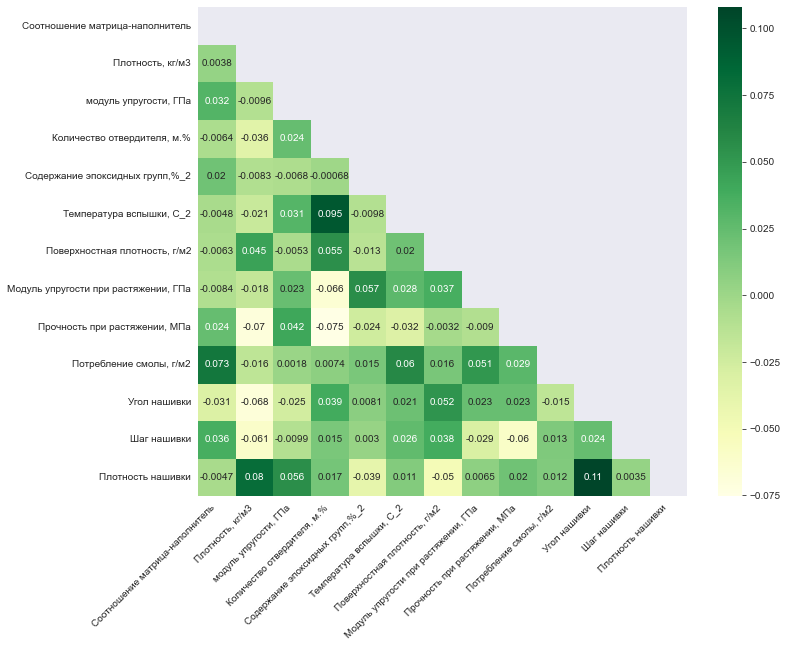

In [48]:
#Визуализация корреляционной матрицы с помощью тепловой карты
mask = np.triu(df.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# # Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. 
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

In [49]:
# График корреляции подтверждает данные теории композитных материалов. Мы видим, что на качество материла влияет температура вспышки и количество отвердителя из-за взаимодействия отвердителя с матрицей и наполнителем под влиянием температуры. Угол нашивки и плотность нашивки несомненно оказывают влияние на свойства материала. А потребление смолы и соотношение матрицы-наполнителя, плотности и плотности нашивки, модуля упругости и плотности нашивки имеют не особенно выраженную корреляцию.

Вывод на данном этапе работы: На наших "сырых" данных мы наблюдаем выбросы в каждом столбце, кроме столбца "Угол нашивки" и корреляция входных переменных очень слабая.